In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.fftpack import fft2, fftshift, ifft2

### 1. Lire l’image cameraman .JPEG .

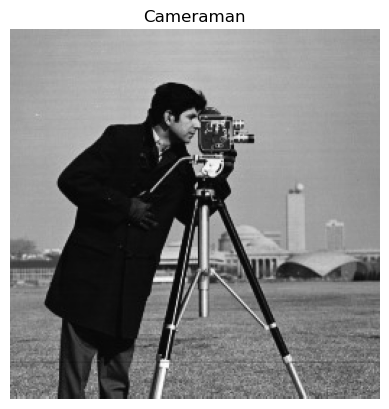

In [100]:
image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title("Cameraman")
plt.axis('off')
plt.show()

### 2. Tracer son histogramme.

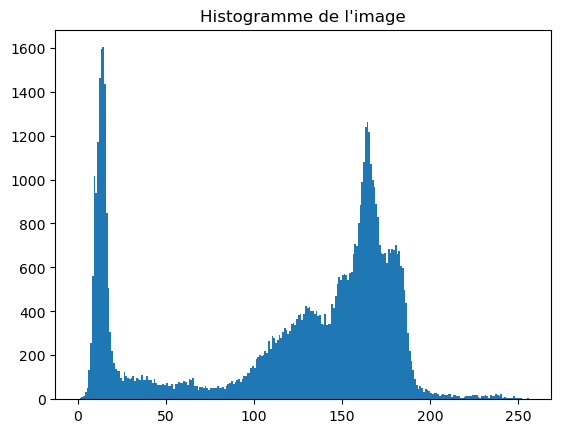

In [101]:
plt.figure()
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.title("Histogramme de l'image")
plt.show()

### 3. Translater cet histogramme à droite et à gauche, afficher à chaque fois l’image obtenue.

In [102]:
def translater_histogram(image, shift):
    translated_image = np.clip(image.astype(np.int16) + shift, 0, 255).astype(np.uint8)
    return translated_image

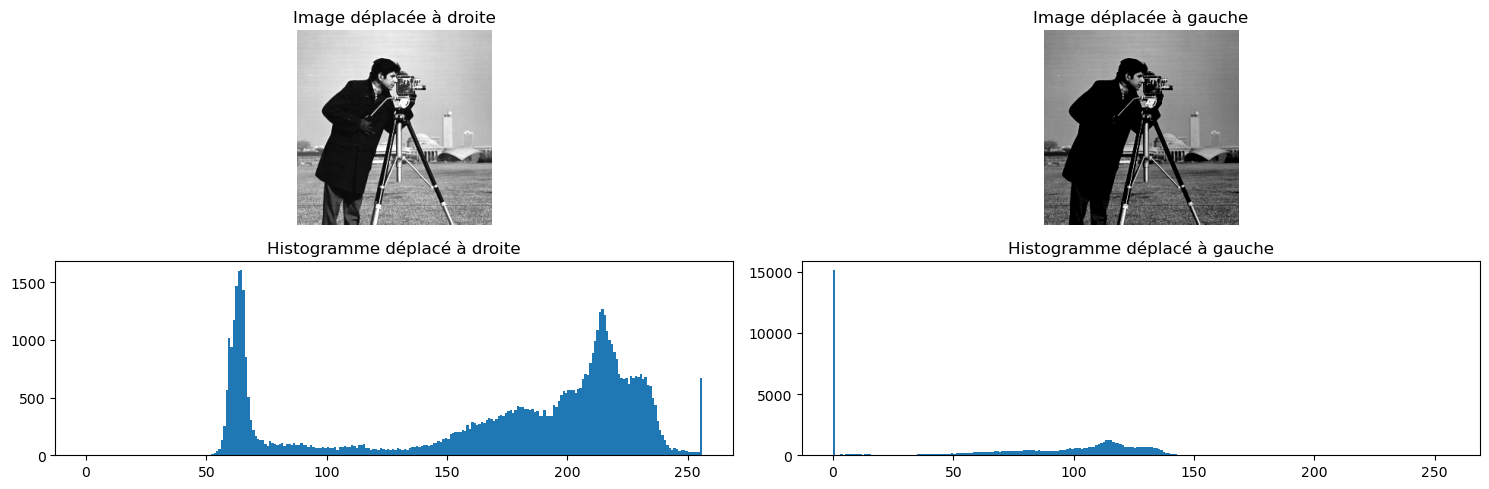

In [107]:

image_right = translater_histogram(image, 50)
image_left = translater_histogram(image, -50)

plt.figure(figsize=(15, 5))

# First row: Images
plt.subplot(2,2,1)
plt.imshow(image_right, cmap='gray')
plt.title("Image déplacée à droite")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_left, cmap='gray')
plt.title("Image déplacée à gauche")
plt.axis('off')

# Second row: Histograms
plt.subplot(2,2,3)
plt.hist(image_right.ravel(), bins=256, range=[0,256])
plt.title("Histogramme déplacé à droite")

plt.subplot(2,2,4)
plt.hist(image_left.ravel(), bins=256, range=[0,256])
plt.title("Histogramme déplacé à gauche")

plt.tight_layout()
plt.show()

### 4. Calculer l’histogramme cumulé de l’image initiale.

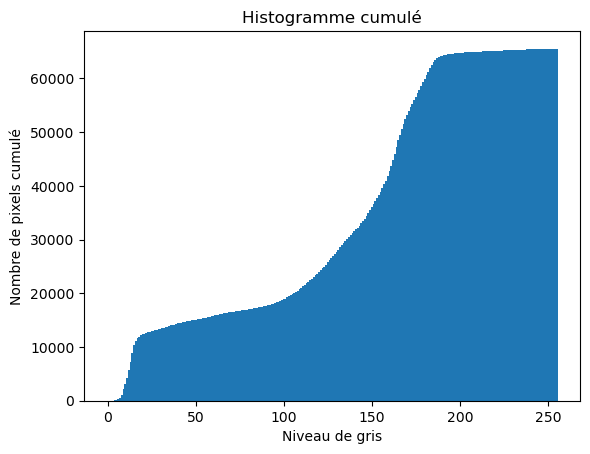

In [104]:
hist_cum = np.cumsum(cv2.calcHist([image], [0], None, [256], [0, 256]))
plt.figure()
plt.bar(range(256), hist_cum, width=1)
plt.title("Histogramme cumulé")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels cumulé")
plt.show()

### 5. Faire l’égalisation de l’histogramme sur l'image thumb_pout (l'image est en RVB).

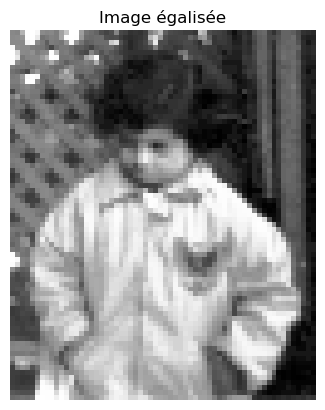

In [108]:
thumb_pout = cv2.imread('thumb_pout.png', cv2.IMREAD_COLOR)
thumb_pout_yuv = cv2.cvtColor(thumb_pout, cv2.COLOR_BGR2YUV)
thumb_pout_yuv[:,:,0] = cv2.equalizeHist(thumb_pout_yuv[:,:,0])
thumb_pout_eq = cv2.cvtColor(thumb_pout_yuv, cv2.COLOR_YUV2BGR)

plt.figure()
plt.imshow(thumb_pout_eq)
plt.title("Image égalisée")
plt.axis('off')
plt.show()
cv2.imshow("Image originale", thumb_pout)
cv2.imshow("Image égalisée", thumb_pout_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. Charger l’image trui.png

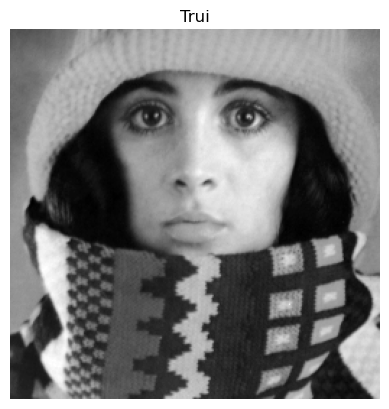

In [106]:
trui = cv2.imread('trui.png', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(trui, cmap='gray')
plt.title("Trui")
plt.axis('off')
plt.show()

### 7. Appliquer le masque Wx de Sobel sur cette image. Afficher le résultat.

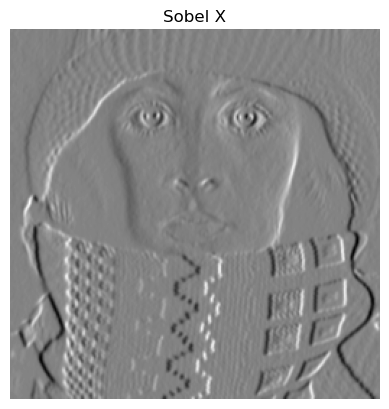

In [74]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gx = convolve2d(trui, sobel_x, mode='same', boundary='symm')

plt.figure()
plt.imshow(gx, cmap='gray')
plt.title("Sobel X")
plt.axis('off')
plt.show()

### 8. Refaire le même travail précédent avec le masque Wy.

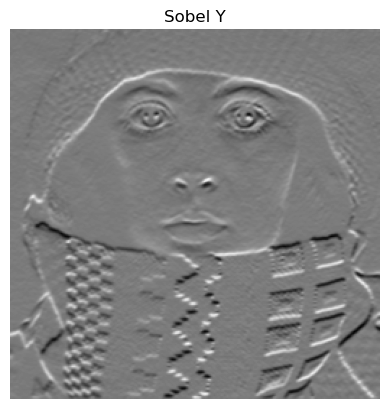

In [75]:
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = convolve2d(trui, sobel_y, mode='same', boundary='symm')

plt.figure()
plt.imshow(gy, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')
plt.show()

### 9. Trouver l’image qui donne le module du gradient.

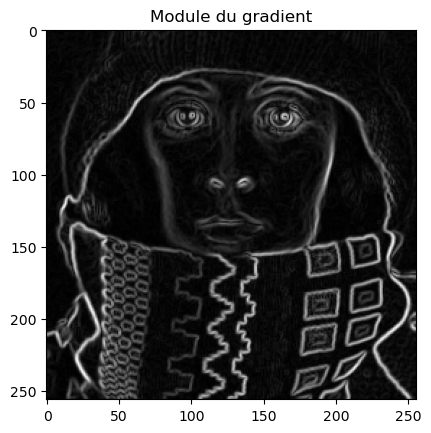

In [76]:
grad_magnitude = np.sqrt(gx**2 + gy**2)
plt.figure()
plt.imshow(grad_magnitude, cmap='gray')
plt.title("Module du gradient")
plt.show()

### 10. Comparer vos résultats avec le programme de Sobel de Matlab.

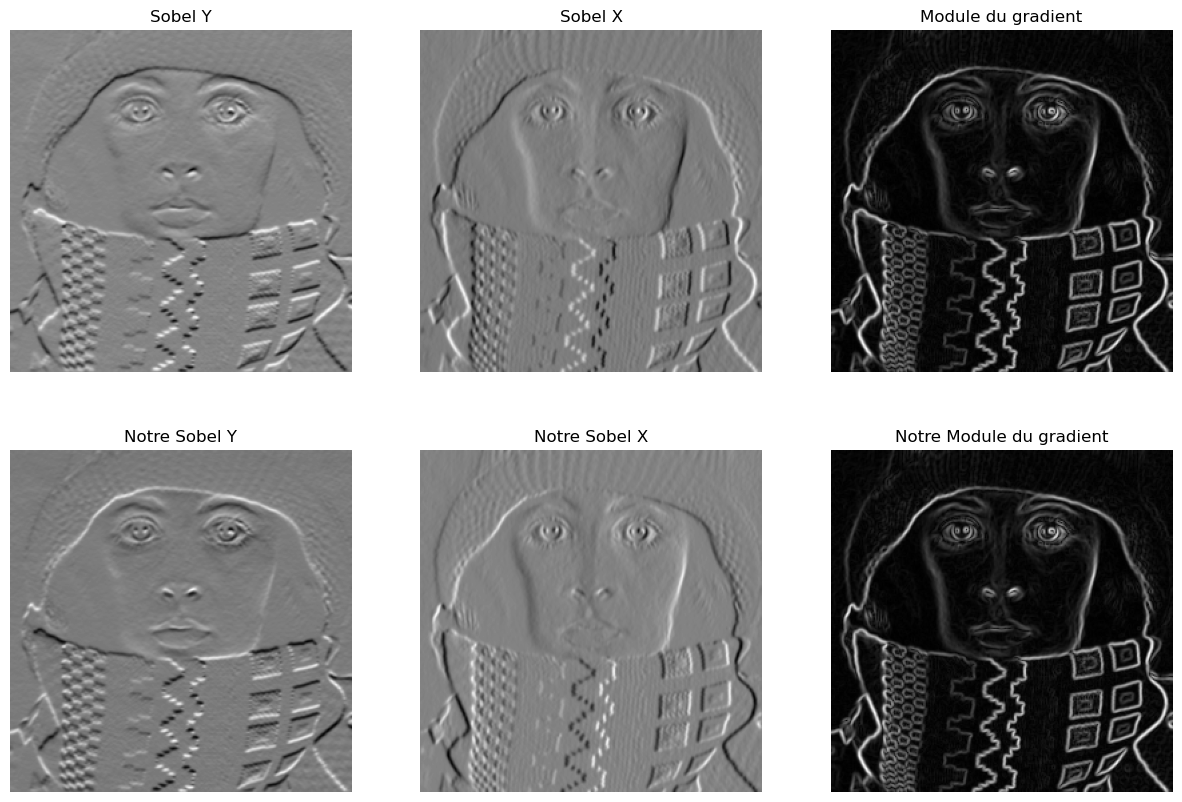

In [77]:
import scipy.ndimage 

py_sobel_y = scipy.ndimage.sobel(trui.astype('int32'), 0)
py_sobel_x = scipy.ndimage.sobel(trui.astype('int32'), 1)
sobel_abs = np.sqrt(py_sobel_x**2 + py_sobel_y**2)
sobel_abs *= 255.0 / np.max(sobel_abs)

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.imshow(py_sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(py_sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(sobel_abs, cmap='gray')
plt.title("Module du gradient")
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(gy, cmap='gray')
plt.title("Notre Sobel Y")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(gx, cmap='gray')
plt.title("Notre Sobel X")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(grad_magnitude, cmap='gray')
plt.title("Notre Module du gradient")
plt.axis('off')
plt.show()

### 11. Générer la TF d’un filtre passe-bas de même taille que l'image cameraman. Appliquer ce filtre à l’image dans le domaine fréquentiel. Afficher le résultat. Faites varier la fréquence de coupure (U0,V0) : (10,10), (20,20)... Conclusions.

In [81]:
def low_pass_filter(shape, cutoff=-1):
    if cutoff == -1:
        cutoff = shape
    filter = np.zeros(shape)
    center_x = shape[0] / 2
    center_y = shape[1] / 2
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    dist_from_center = np.sqrt((x - center_y)**2 + (y - center_x)**2)
    radius = min(cutoff) / 2
    filter[dist_from_center <= radius] = 1

    return filter/np.sum(filter)

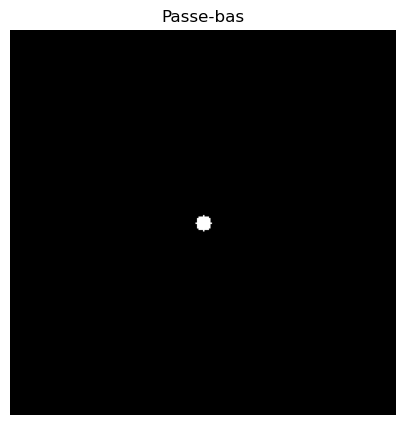

1.0


In [110]:
FPB = low_pass_filter(image.shape,(10,10))

plt.figure(figsize=(10, 5))
plt.imshow(FPB, cmap='gray')
plt.title("Passe-bas")
plt.axis('off')
plt.show()
print(np.sum(FPB))

In [83]:
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)
    
    return magnitude, phase

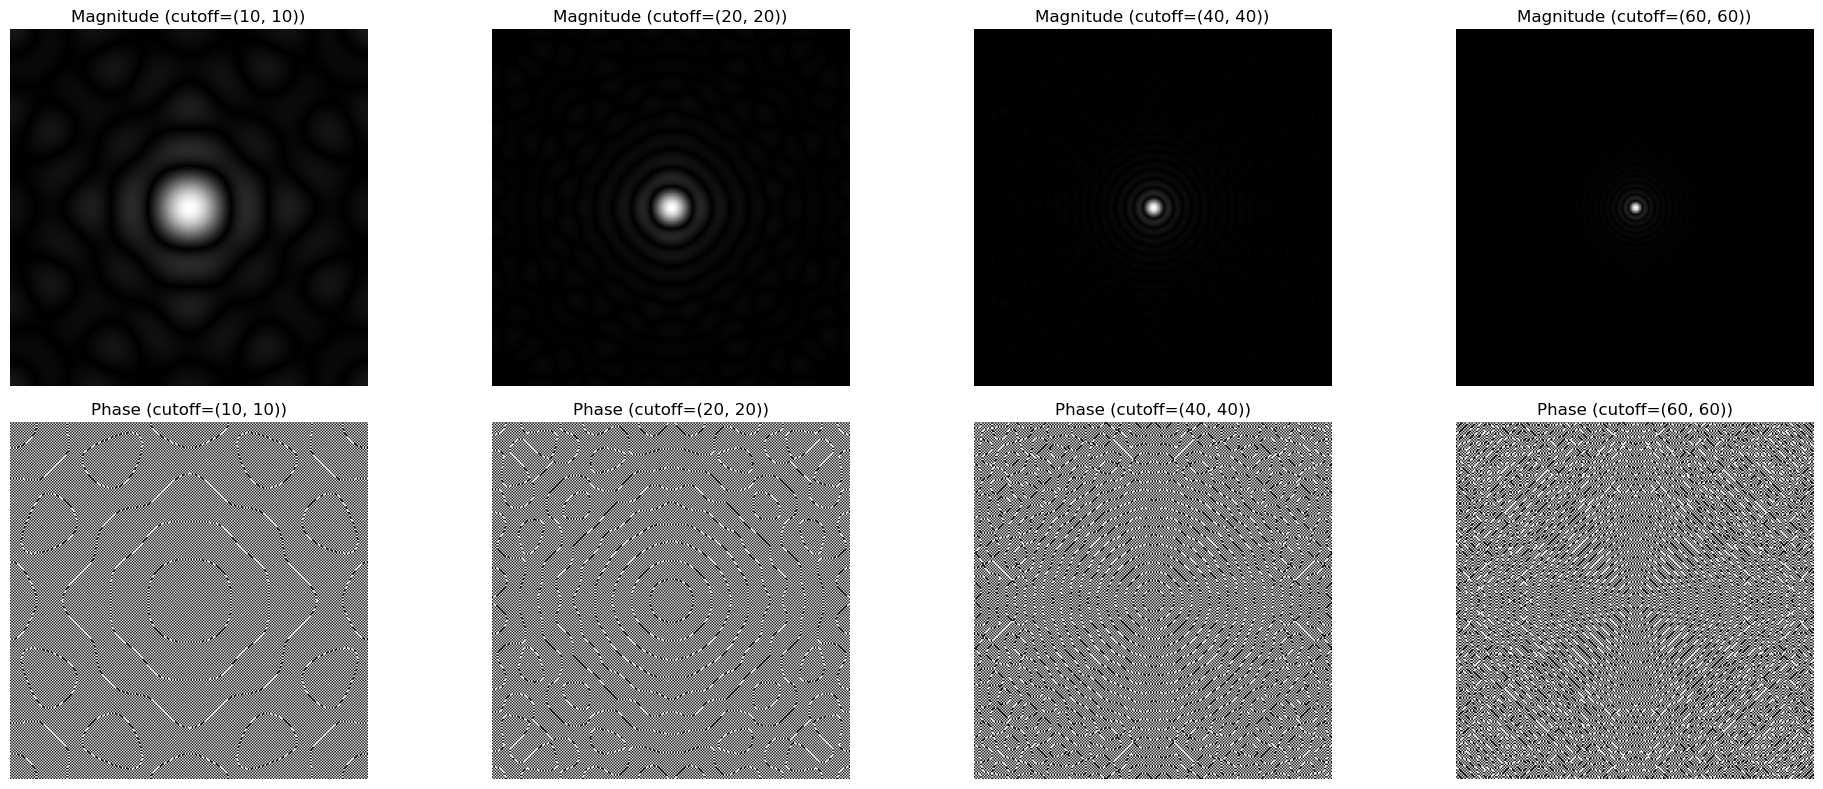

In [84]:
cutoffs = [(10,10), (20,20), (40,40), (60,60)]
plt.figure(figsize=(20, 8))

for i, cutoff in enumerate(cutoffs):
    magnitude, phase = fourier_transform(low_pass_filter(image.shape, cutoff))
    
    plt.subplot(2, 4, i+1)
    plt.imshow(magnitude, cmap='gray')
    plt.title(f'Magnitude (cutoff={cutoff})')
    plt.axis('off')
    
    plt.subplot(2, 4, i+5)
    plt.imshow(phase, cmap='gray')
    plt.title(f'Phase (cutoff={cutoff})')
    plt.axis('off')

plt.tight_layout()
plt.show()

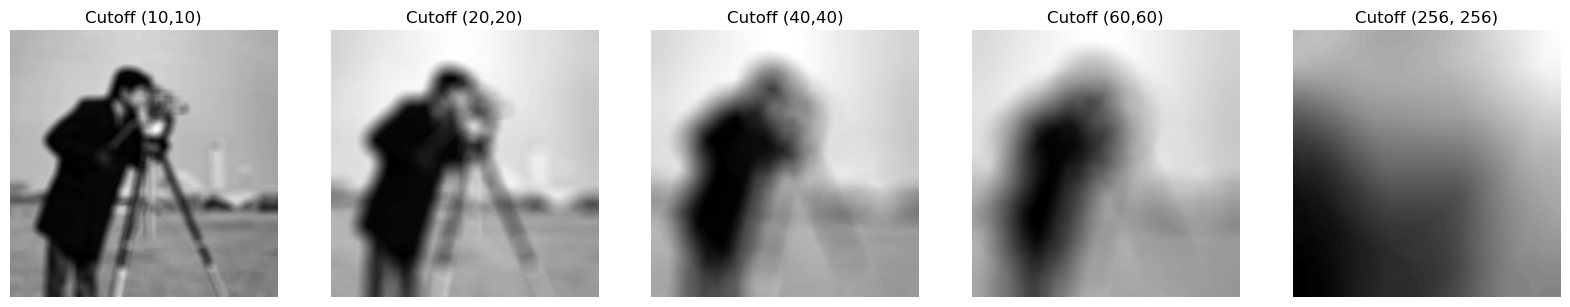

In [87]:
magnitude, phase = fourier_transform(image)
FBP1 = low_pass_filter(image.shape, (10,10))
FBP2 = low_pass_filter(image.shape, (20,20))
FBP3 = low_pass_filter(image.shape, (40,40))
FBP4 = low_pass_filter(image.shape, (60,60))
FBP5 = low_pass_filter(image.shape)

image1 = cv2.filter2D(image, -1, FBP1)
image2 = cv2.filter2D(image, -1, FBP2)
image3 = cv2.filter2D(image, -1, FBP3)
image4 = cv2.filter2D(image, -1, FBP4)
image5 = cv2.filter2D(image, -1, FBP5)

plt.figure(figsize=(20, 4))
plt.subplot(151)
plt.imshow(image1, cmap='gray')
plt.title("Cutoff (10,10)")
plt.axis('off')

plt.subplot(152)
plt.imshow(image2, cmap='gray')
plt.title("Cutoff (20,20)")
plt.axis('off')

plt.subplot(153)
plt.imshow(image3, cmap='gray')
plt.title("Cutoff (40,40)")
plt.axis('off')

plt.subplot(154)
plt.imshow(image4, cmap='gray')
plt.title("Cutoff (60,60)")
plt.axis('off')

plt.subplot(155)
plt.imshow(image5, cmap='gray')
plt.title(f"Cutoff {image.shape}")
plt.axis('off')

plt.show()

In [ ]:
magnitude, phase = fourier_transform(image)
FBP1 = low_pass_filter(image.shape, (10,10))
FBP2 = low_pass_filter(image.shape, (20,20))
FBP3 = low_pass_filter(image.shape, (40,40))
FBP4 = low_pass_filter(image.shape, (60,60))
FBP5 = low_pass_filter(image.shape, image.shape)

image_magnitude, image_phase = fourier_transform(image)
FBP1_magnitude, FBP1_phase = fourier_transform(FBP1)
FBP2_magnitude, FBP2_phase = fourier_transform(FBP2)
FBP3_magnitude, FBP3_phase = fourier_transform(FBP3)
FBP4_magnitude, FBP4_phase = fourier_transform(FBP4)
FBP5_magnitude, FBP5_phase = fourier_transform(FBP5)
# Multiply the image's FFT with each filter's FFT and inverse transform
image1 = np.real(ifft2(image_magnitude * np.exp(1j * image_phase) * FBP1_magnitude * np.exp(1j * FBP1_phase)))
image2 = np.real(ifft2(image_magnitude * np.exp(1j * image_phase) * FBP2_magnitude * np.exp(1j * FBP2_phase)))
image3 = np.real(ifft2(image_magnitude * np.exp(1j * image_phase) * FBP3_magnitude * np.exp(1j * FBP3_phase)))
image4 = np.real(ifft2(image_magnitude * np.exp(1j * image_phase) * FBP4_magnitude * np.exp(1j * FBP4_phase)))
image5 = np.real(ifft2(image_magnitude * np.exp(1j * image_phase) * FBP5_magnitude * np.exp(1j * FBP5_phase)))

# Convert back to uint8
image1 = np.clip(image1, 0, 255).astype(np.uint8)
image2 = np.clip(image2, 0, 255).astype(np.uint8)
image3 = np.clip(image3, 0, 255).astype(np.uint8)
image4 = np.clip(image4, 0, 255).astype(np.uint8)
image5 = np.clip(image5, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 4))
plt.subplot(151)
plt.imshow(image1, cmap='gray')
plt.title("Cutoff (10,10)")
plt.axis('off')

plt.subplot(152)
plt.imshow(image2, cmap='gray')
plt.title("Cutoff (20,20)")
plt.axis('off')

plt.subplot(153)
plt.imshow(image3, cmap='gray')
plt.title("Cutoff (40,40)")
plt.axis('off')

plt.subplot(154)
plt.imshow(image4, cmap='gray')
plt.title("Cutoff (60,60)")
plt.axis('off')

plt.subplot(155)
plt.imshow(image5, cmap='gray')
plt.title("Cutoff {image.shape}")
plt.axis('off')

plt.show()

### 12. Refaire le même travail demandé en 11 avec un filtre passe-haut.

In [95]:
def high_pass_filter(shape, cutoff=-1):
    Mid = np.zeros(shape)
    Mid[shape[0]//2, shape[1]//2] = 1
    return  Mid - low_pass_filter(shape, cutoff)

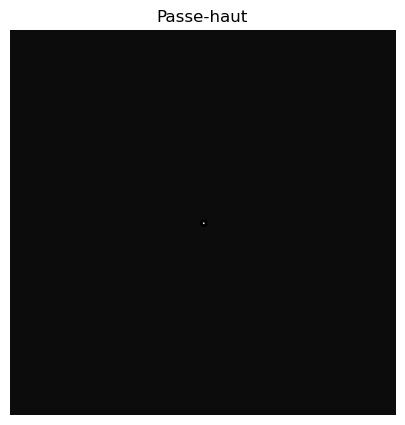

-5.551115123125783e-17


In [96]:
FPH = high_pass_filter(image.shape,(5,5))

plt.figure(figsize=(10, 5))
plt.imshow(FPH, cmap='gray')
plt.title("Passe-haut")
plt.axis('off')
plt.show()
print(np.sum(FPH))

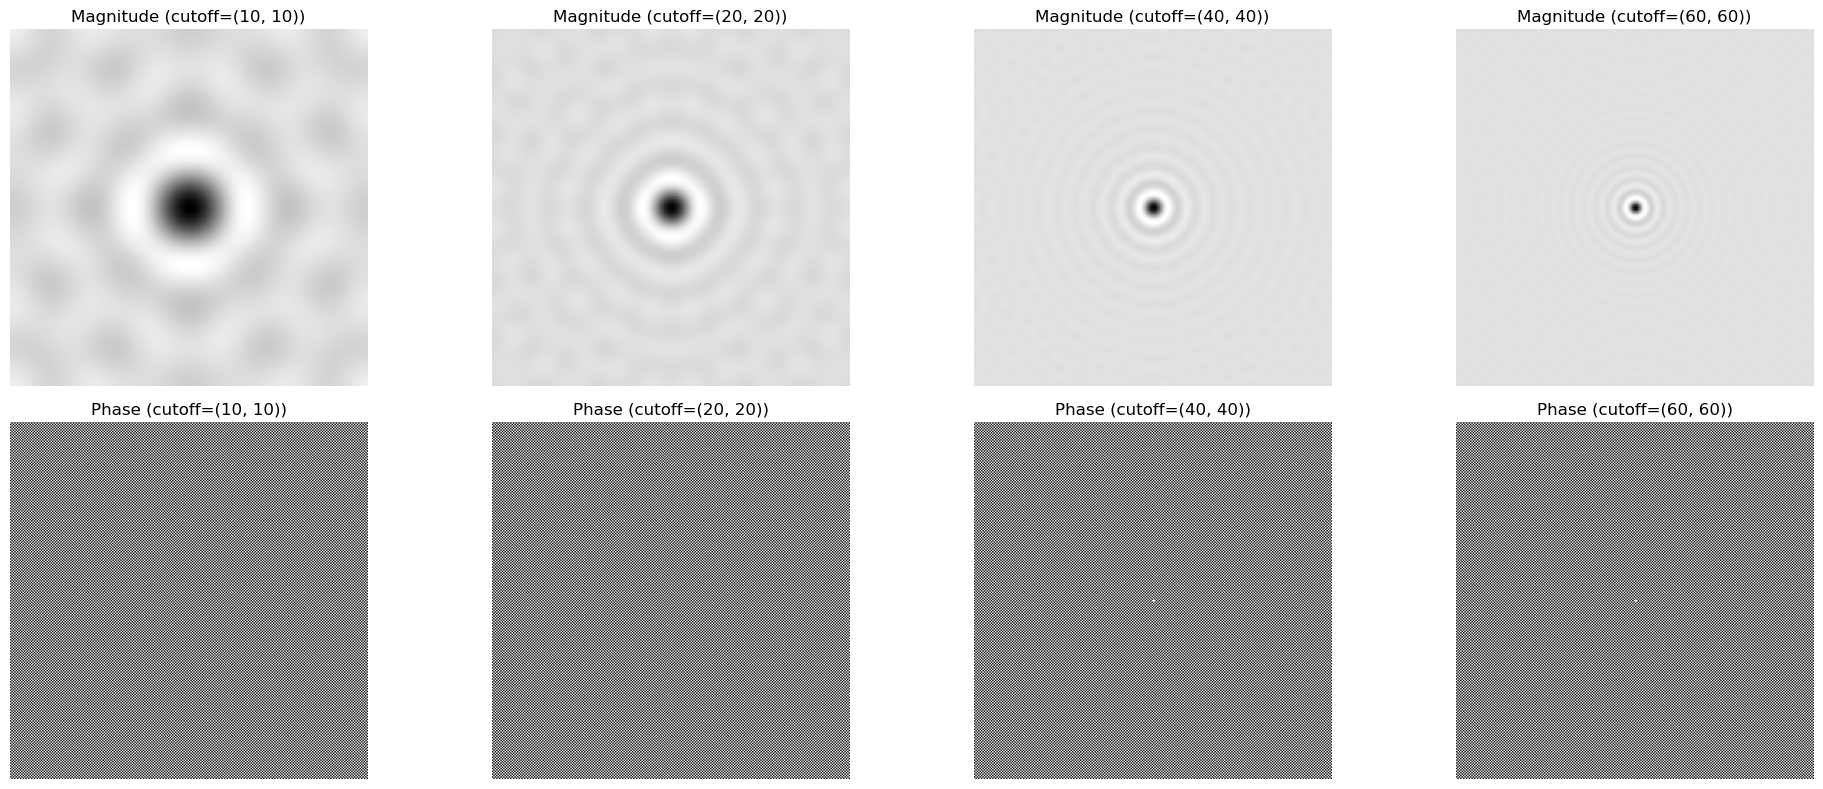

In [97]:
cutoffs = [(10,10), (20,20), (40,40), (60,60)]
plt.figure(figsize=(20, 8))

for i, cutoff in enumerate(cutoffs):
    magnitude, phase = fourier_transform(high_pass_filter(image.shape, cutoff))
    
    plt.subplot(2, 4, i+1)
    plt.imshow(magnitude, cmap='gray')
    plt.title(f'Magnitude (cutoff={cutoff})')
    plt.axis('off')
    
    plt.subplot(2, 4, i+5)
    plt.imshow(phase, cmap='gray')
    plt.title(f'Phase (cutoff={cutoff})')
    plt.axis('off')

plt.tight_layout()
plt.show()

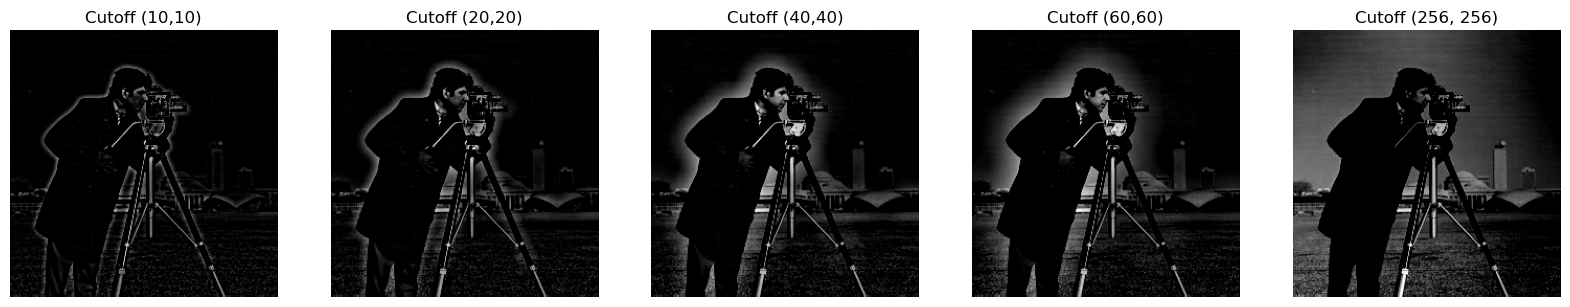

In [98]:
magnitude, phase = fourier_transform(image)
FPH1 = high_pass_filter(image.shape, (10,10))
FPH2 = high_pass_filter(image.shape, (20,20))
FPH3 = high_pass_filter(image.shape, (40,40))
FPH4 = high_pass_filter(image.shape, (60,60))
FPH5 = high_pass_filter(image.shape)

image1 = cv2.filter2D(image, -1, FPH1)
image2 = cv2.filter2D(image, -1, FPH2)
image3 = cv2.filter2D(image, -1, FPH3)
image4 = cv2.filter2D(image, -1, FPH4)
image5 = cv2.filter2D(image, -1, FPH5)

plt.figure(figsize=(20, 4))
plt.subplot(151)
plt.imshow(image1, cmap='gray')
plt.title("Cutoff (10,10)")
plt.axis('off')

plt.subplot(152)
plt.imshow(image2, cmap='gray')
plt.title("Cutoff (20,20)")
plt.axis('off')

plt.subplot(153)
plt.imshow(image3, cmap='gray')
plt.title("Cutoff (40,40)")
plt.axis('off')

plt.subplot(154)
plt.imshow(image4, cmap='gray')
plt.title("Cutoff (60,60)")
plt.axis('off')

plt.subplot(155)
plt.imshow(image5, cmap='gray')
plt.title(f"Cutoff {image.shape}")
plt.axis('off')

plt.show()